In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering

from sklearn_extra.cluster import KMedoids

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer

import warnings
warnings.filterwarnings('ignore')

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
url = 'https://raw.githubusercontent.com/aaasatoou/bootcamp_blue_Projeto2/main/Estudo%20COVID%20-%20Insights%20e%20Previs%C3%B5es/dados/Silver/datasets/WebScraping-covid+argentina.csv'

not_arg = pd.read_csv(url)
not_arg.drop(['Unnamed: 0','URL da noticia'],axis=1,inplace=True)
not_arg.head()

,Titulo,Data
0,En 2019 hubo récord de donantes y trasplantes ...,01-01-2020
1,Diez años de grieta son una década perdida par...,01-01-2020
2,General Las Heras: gigantesco incendio destruy...,01-01-2020
3,"Sale $ 50, un ""todo por 2 pesos"" renovado",01-01-2020
4,Las apps que eligen los influencers de viajes ...,01-01-2020


In [ ]:
not_arg.tail()

,Titulo,Data
7064,Por qué algunos países han reducido el aislami...,31-12-2021
7065,El Covid bajó a un equipo del Mundial de Clube...,31-12-2021
7066,COVID-19 en Argentina: los casos se duplican c...,31-12-2021
7067,"Larga la ATP Cup, el nuevo Mundial de tenis, q...",31-12-2021
7068,Cómo se recibirá el Año Nuevo en América Latin...,31-12-2021


In [ ]:
not_arg['Data'] = pd.to_datetime(not_arg['Data'],format='%d-%m-%Y')
not_arg.head()

,Titulo,Data
0,En 2019 hubo récord de donantes y trasplantes ...,2020-01-01
1,Diez años de grieta son una década perdida par...,2020-01-01
2,General Las Heras: gigantesco incendio destruy...,2020-01-01
3,"Sale $ 50, un ""todo por 2 pesos"" renovado",2020-01-01
4,Las apps que eligen los influencers de viajes ...,2020-01-01


In [ ]:
not_arg['Titulo'] = not_arg['Titulo'].str.lower()
not_arg.head()

,Titulo,Data
0,en 2019 hubo récord de donantes y trasplantes ...,2020-01-01
1,diez años de grieta son una década perdida par...,2020-01-01
2,general las heras: gigantesco incendio destruy...,2020-01-01
3,"sale $ 50, un ""todo por 2 pesos"" renovado",2020-01-01
4,las apps que eligen los influencers de viajes ...,2020-01-01


In [ ]:
# Removendo os stop words das colunas descripion e title
stop = stopwords.words(['spanish','english'])

not_arg['Titulo'] = not_arg['Titulo'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
not_arg.head()

,Titulo,Data
0,2019 récord donantes trasplantes órganos argen...,2020-01-01
1,diez años grieta década perdida argentina,2020-01-01
2,general heras: gigantesco incendio destruyó fá...,2020-01-01
3,"sale $ 50, ""todo 2 pesos"" renovado",2020-01-01
4,apps eligen influencers viajes conocer mundo,2020-01-01


In [ ]:
# Aplicando lemantização
def lema(coluna):
  lema = []
  wnl = WordNetLemmatizer()
  lista = list(coluna)
  for i in range(len(lista)):
    lista_le = nltk.word_tokenize(lista[i])
    junta = ' '.join([wnl.lemmatize(words) for words in lista_le])
    lema.append(junta)
  coluna = lema
  return coluna

In [ ]:
not_arg['Titulo'] = lema(not_arg['Titulo'])
not_arg.head()

,Titulo,Data
0,2019 récord donantes trasplantes órganos argen...,2020-01-01
1,diez años grieta década perdida argentina,2020-01-01
2,general hera : gigantesco incendio destruyó fá...,2020-01-01
3,"sale $ 50 , `` todo 2 peso '' renovado",2020-01-01
4,apps eligen influencers viajes conocer mundo,2020-01-01


In [ ]:
not_arg['Ano'] = not_arg['Data'].dt.year
not_arg.head()

,Titulo,Data,Ano
0,2019 récord donantes trasplantes órganos argen...,2020-01-01,2020
1,diez años grieta década perdida argentina,2020-01-01,2020
2,general hera : gigantesco incendio destruyó fá...,2020-01-01,2020
3,"sale $ 50 , `` todo 2 peso '' renovado",2020-01-01,2020
4,apps eligen influencers viajes conocer mundo,2020-01-01,2020


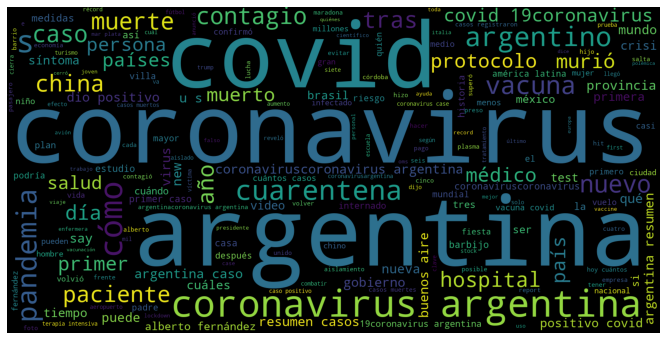

In [ ]:
juntar_texto = ''.join(s for s in not_arg[not_arg['Ano']==2020]['Titulo'])
wordcloud = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud);

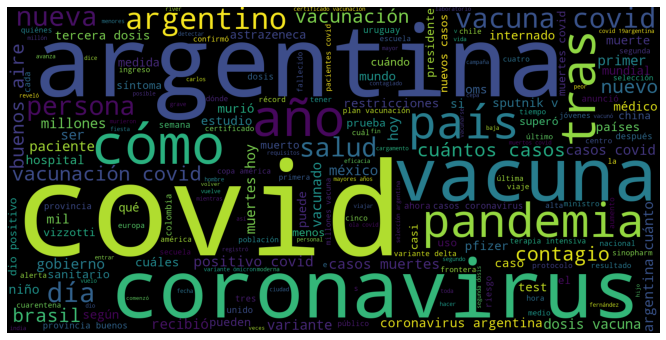

In [ ]:
juntar_texto2 = ''.join(s for s in not_arg[not_arg['Ano']==2021]['Titulo'])
wordcloud2 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto2)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud2, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud2);

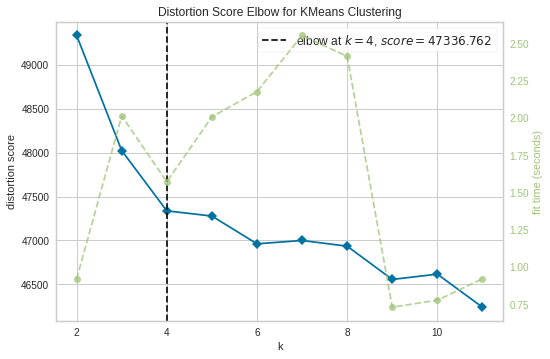

In [ ]:
count_vec = CountVectorizer()
tit_not_ma = count_vec.fit_transform(not_arg['Titulo'])

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,12))
visualizer.fit(tit_not_ma)
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tit_not_ma)
not_arg['Cluster'] = kmeans.labels_
not_arg.head()

,Titulo,Data,Ano,Cluster
0,2019 récord donantes trasplantes órganos argen...,2020-01-01,2020,3
1,diez años grieta década perdida argentina,2020-01-01,2020,3
2,general hera : gigantesco incendio destruyó fá...,2020-01-01,2020,3
3,"sale $ 50 , `` todo 2 peso '' renovado",2020-01-01,2020,3
4,apps eligen influencers viajes conocer mundo,2020-01-01,2020,3


In [ ]:
not_arg['Cluster'] = not_arg['Cluster'].map({0:0,1:1,2:2,3:2}) 
not_arg.head()

,Titulo,Data,Ano,Cluster
0,2019 récord donantes trasplantes órganos argen...,2020-01-01,2020,2
1,diez años grieta década perdida argentina,2020-01-01,2020,2
2,general hera : gigantesco incendio destruyó fá...,2020-01-01,2020,2
3,"sale $ 50 , `` todo 2 peso '' renovado",2020-01-01,2020,2
4,apps eligen influencers viajes conocer mundo,2020-01-01,2020,2


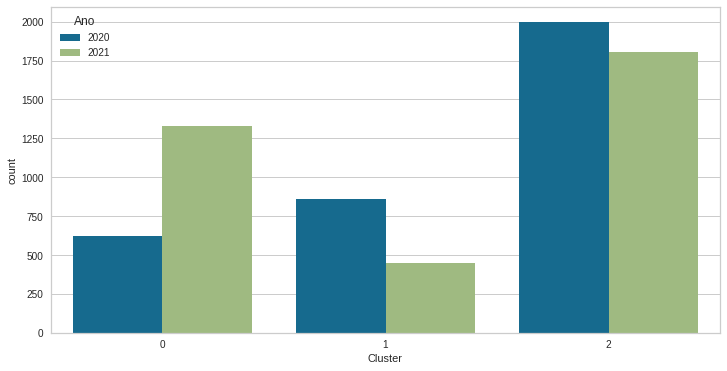

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Cluster',data=not_arg,hue='Ano')

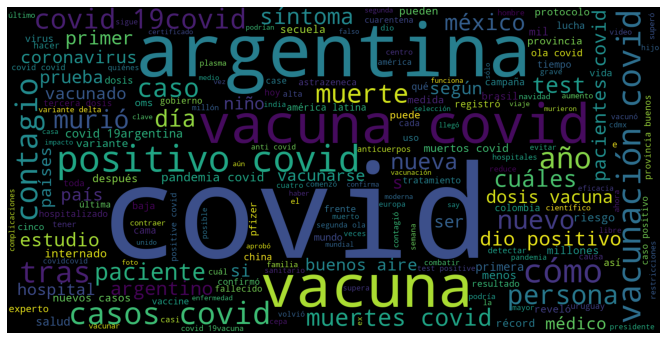

In [ ]:
juntar_texto_cluster_0 = ''.join(s for s in not_arg[not_arg['Cluster']==0]['Titulo'])
wordcloud_cluster_0 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_0)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_0, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_0);

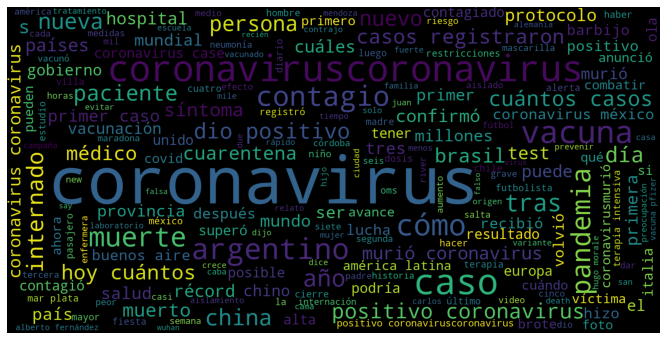

In [ ]:
juntar_texto_cluster_1 = ''.join(s for s in not_arg[not_arg['Cluster']==1]['Titulo'])
wordcloud_cluster_1 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_1)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_1, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_1);

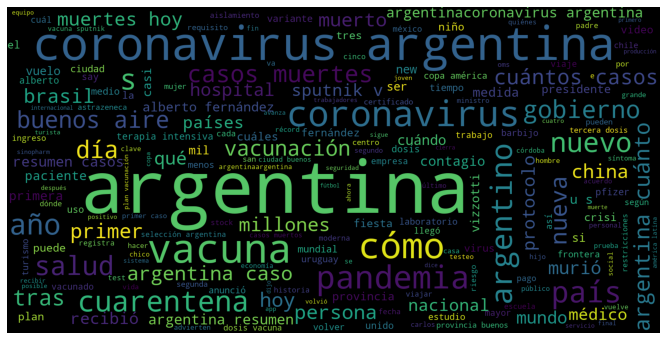

In [ ]:
juntar_texto_cluster_3 = ''.join(s for s in not_arg[not_arg['Cluster']==2]['Titulo'])
wordcloud_cluster_3 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_3)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_3, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_3);

In [ ]:
not_arg['Cluster'] = not_arg['Cluster'].map({0:0,1:1,2:0})


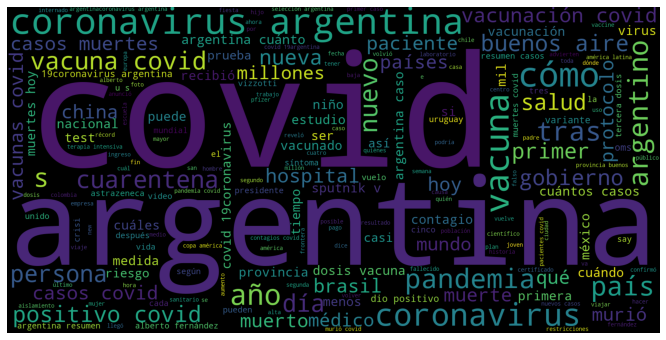

In [ ]:
juntar_texto_cluster_0 = ''.join(s for s in not_arg[not_arg['Cluster']==0]['Titulo'])
wordcloud_cluster_0 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_0)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_0, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_0);

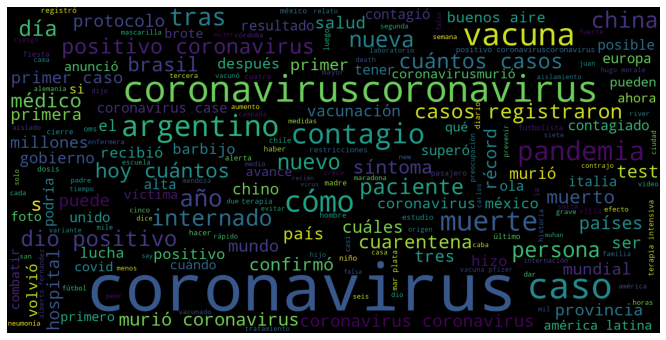

In [ ]:
juntar_texto_cluster_1 = ''.join(s for s in not_arg[not_arg['Cluster']==1]['Titulo'])
wordcloud_cluster_1 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_1)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_1, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_1);

In [ ]:
not_arg.head()

,Titulo,Ano,Cluster
0,2019 récord donantes trasplantes órganos argen...,2020,0
1,diez años grieta década perdida argentina,2020,0
2,general hera : gigantesco incendio destruyó fá...,2020,0
3,"sale $ 50 , `` todo 2 peso '' renovado",2020,0
4,apps eligen influencers viajes conocer mundo,2020,0


In [ ]:
not_arg.to_csv('Titulos Argentina Com Cluster.csv')

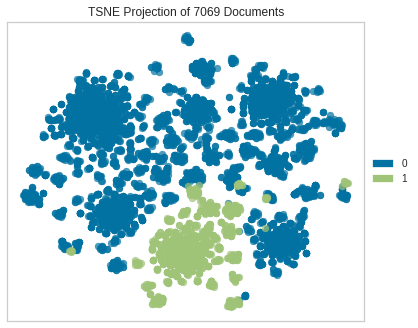

In [ ]:
tsne = TSNEVisualizer()
tsne.fit(tit_not_ma, not_arg.Cluster)
tsne.show()

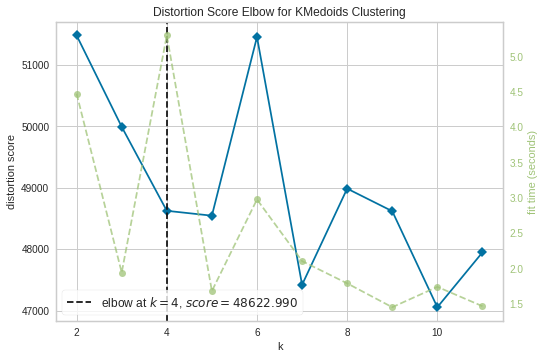

In [ ]:
kmedoids = KMedoids(init='k-medoids++')
visualizer2 = KElbowVisualizer(kmedoids, k=(2,12))
visualizer2.fit(tit_not_ma)
visualizer2.show()

In [ ]:
kmedoids = KMedoids(init='k-medoids++',n_clusters=3)
kmedoids.fit(tit_not_ma)
not_arg['Cluster2'] = kmedoids.labels_
not_arg.head()

,Titulo,Data,Ano,Cluster,Cluster2
0,2019 récord donantes trasplantes órganos argen...,2020-01-01,2020,2,0
1,diez años grieta década perdida argentina,2020-01-01,2020,2,0
2,general hera : gigantesco incendio destruyó fá...,2020-01-01,2020,2,0
3,"sale $ 50 , `` todo 2 peso '' renovado",2020-01-01,2020,2,0
4,apps eligen influencers viajes conocer mundo,2020-01-01,2020,2,0


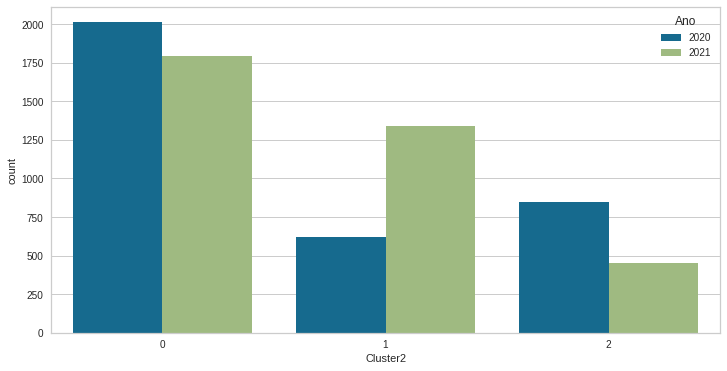

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Cluster2',data=not_arg,hue='Ano')

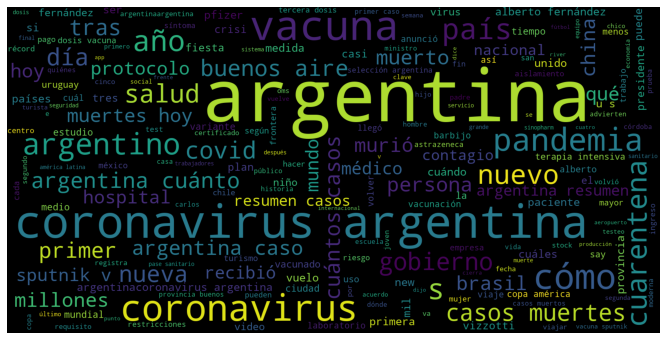

In [ ]:
juntar_texto_cluster_m_0 = ''.join(s for s in not_arg[not_arg['Cluster2']==0]['Titulo'])
wordcloud_cluster_m_0 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_m_0)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_m_0, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_m_0);

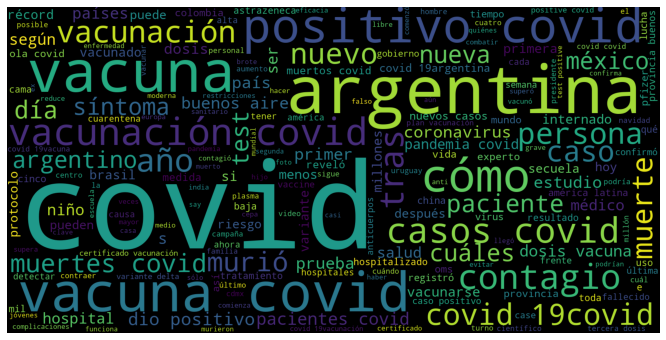

In [ ]:
juntar_texto_cluster_m_1 = ''.join(s for s in not_arg[not_arg['Cluster2']==1]['Titulo'])
wordcloud_cluster_m_1 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_m_1)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_m_1, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_m_1);

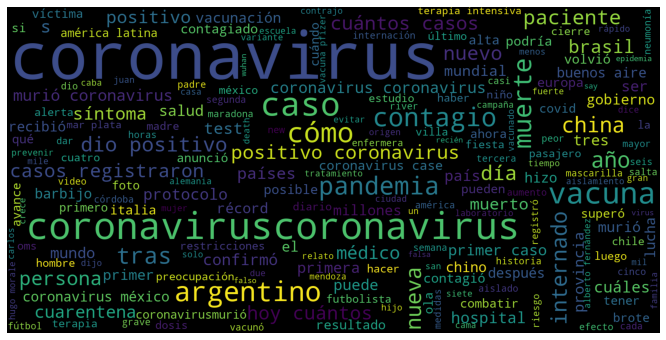

In [ ]:
juntar_texto_cluster_m_2 = ''.join(s for s in not_arg[not_arg['Cluster2']==2]['Titulo'])
wordcloud_cluster_m_2 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_m_2)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_m_2, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_m_2);

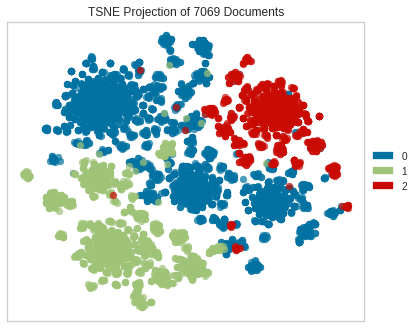

In [ ]:
tsne = TSNEVisualizer()
tsne.fit(tit_not_ma, not_arg.Cluster2)
tsne.show()

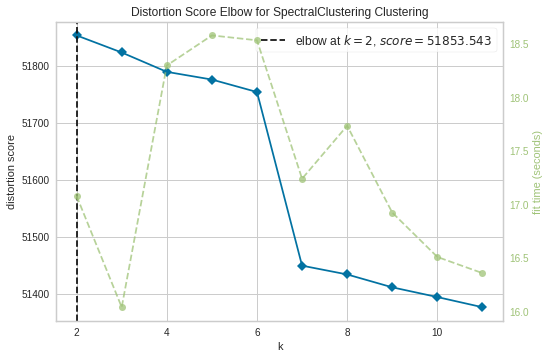

In [ ]:
spe = SpectralClustering()
visualizer3 = KElbowVisualizer(spe, k=(2,12))
visualizer3.fit(tit_not_ma)
visualizer3.show()

In [ ]:
spe = SpectralClustering(n_clusters=3).fit(tit_not_ma)
not_arg['Cluster3'] = spe.labels_
not_arg.head()

,Titulo,Data,Ano,Cluster,Cluster2,Cluster3
0,2019 récord donantes trasplantes órganos argen...,2020-01-01,2020,2,0,0
1,diez años grieta década perdida argentina,2020-01-01,2020,2,0,0
2,general hera : gigantesco incendio destruyó fá...,2020-01-01,2020,2,0,0
3,"sale $ 50 , `` todo 2 peso '' renovado",2020-01-01,2020,2,0,0
4,apps eligen influencers viajes conocer mundo,2020-01-01,2020,2,0,0


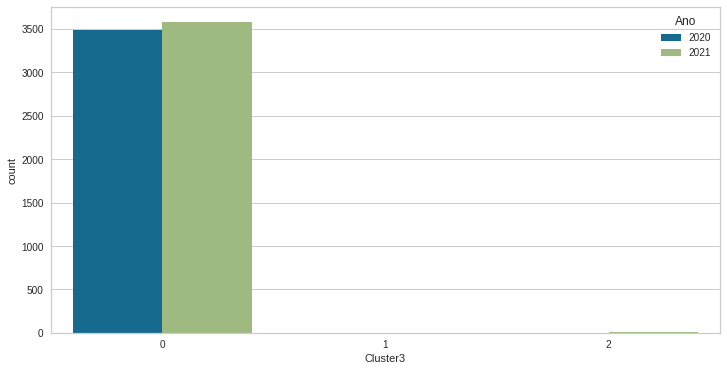

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='Cluster3',data=not_arg,hue='Ano')

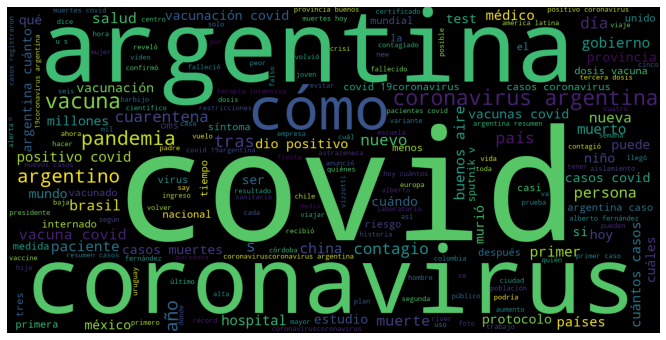

In [ ]:
juntar_texto_cluster_s_0 = ''.join(s for s in not_arg[not_arg['Cluster3']==0]['Titulo'])
wordcloud_cluster_s_0 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_s_0)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_s_0, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_s_0);

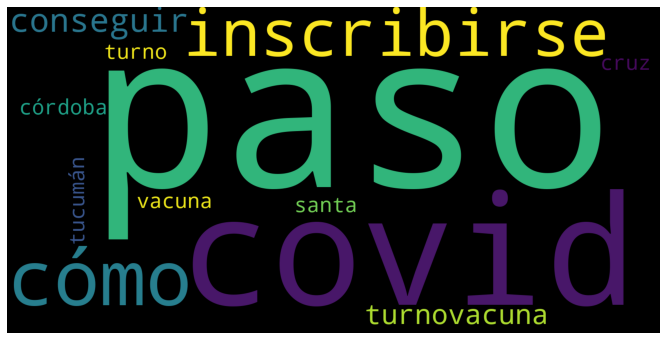

In [ ]:
juntar_texto_cluster_s_1 = ''.join(s for s in not_arg[not_arg['Cluster3']==1]['Titulo'])
wordcloud_cluster_s_1 = WordCloud(background_color="black",width=1600, height=800).generate(juntar_texto_cluster_s_1)

fig, ax = plt.subplots(figsize=(12,6))
ax.imshow(wordcloud_cluster_s_1, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud_cluster_s_1);

In [ ]:
not_arg.head()

,Titulo,Data,Ano,Cluster,Cluster2,Cluster3
0,2019 récord donantes trasplantes órganos argen...,2020-01-01,2020,2,0,0
1,diez años grieta década perdida argentina,2020-01-01,2020,2,0,0
2,general hera : gigantesco incendio destruyó fá...,2020-01-01,2020,2,0,0
3,"sale $ 50 , `` todo 2 peso '' renovado",2020-01-01,2020,2,0,0
4,apps eligen influencers viajes conocer mundo,2020-01-01,2020,2,0,0


In [ ]:
not_arg = not_arg[['Titulo','Ano','Cluster']]
not_arg.head()

,Titulo,Ano,Cluster
0,2019 récord donantes trasplantes órganos argen...,2020,2
1,diez años grieta década perdida argentina,2020,2
2,general hera : gigantesco incendio destruyó fá...,2020,2
3,"sale $ 50 , `` todo 2 peso '' renovado",2020,2
4,apps eligen influencers viajes conocer mundo,2020,2


In [ ]:
not_arg.to_csv('Titulo Noticias Argentina Com Cluster.csv')